In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [101]:
df = pd.read_csv("/content/Student Depression Dataset.csv")

In [102]:
print(df.head)

<bound method NDFrame.head of            id  Gender  Age Profession  Academic Pressure  Work Pressure  CGPA  \
0           2    Male   33    Student                  5              0  8.97   
1           8  Female   24    Student                  2              0  5.90   
2          26    Male   31    Student                  3              0  7.03   
3          30  Female   28    Student                  3              0  5.59   
4          32  Female   25    Student                  4              0  8.13   
...       ...     ...  ...        ...                ...            ...   ...   
27896  140685  Female   27    Student                  5              0  5.75   
27897  140686    Male   27    Student                  2              0  9.40   
27898  140689    Male   31    Student                  3              0  6.61   
27899  140690  Female   18    Student                  5              0  6.88   
27900  140699    Male   27    Student                  4              0  9.24  

In [103]:
print(df.columns.tolist())

['id', 'Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [104]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())
    print(f"Total unique values: {df[col].nunique()}")


Column: id
[     2      8     26 ... 140689 140690 140699]
Total unique values: 27901

Column: Gender
['Male' 'Female']
Total unique values: 2

Column: Age
[33 24 31 28 25 29 30 27 19 20 23 18 21 22 34 32 26 39 35 42 36 58 49 38
 51 44 43 46 59 54 48 56 37 41]
Total unique values: 34

Column: Profession
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Total unique values: 14

Column: Academic Pressure
[5 2 3 4 1 0]
Total unique values: 6

Column: Work Pressure
[0 5 2]
Total unique values: 3

Column: CGPA
[ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.

In [105]:
df = df.drop(columns=['id'])

print(df.columns.tolist())

['Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [106]:
print(df.head())

   Gender  Age Profession  Academic Pressure  Work Pressure  CGPA  \
0    Male   33    Student                  5              0  8.97   
1  Female   24    Student                  2              0  5.90   
2    Male   31    Student                  3              0  7.03   
3  Female   28    Student                  3              0  5.59   
4  Female   25    Student                  4              0  8.13   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                   2                 0          5-6 hours        Healthy   
1                   5                 0          5-6 hours       Moderate   
2                   5                 0  Less than 5 hours        Healthy   
3                   2                 0          7-8 hours       Moderate   
4                   3                 0          5-6 hours       Moderate   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0  B.Pharm                                   Yes    

In [107]:
# Find the most frequent profession
most_frequent_profession = df['Profession'].value_counts().idxmax()

# Replace all other professions with "Others"
df['Profession'] = df['Profession'].apply(
    lambda x: x if x == most_frequent_profession else 'Others'
)

# Check results
print(df['Profession'].value_counts())

Profession
Student    27870
Others        31
Name: count, dtype: int64


In [108]:
print("Unique values in Profession column:")
print(df['Profession'].unique())
print("Total unique values:", df['Profession'].nunique())


Unique values in Profession column:
['Student' 'Others']
Total unique values: 2


In [109]:
# Replace NaN with 5 in 'Financial Stress' column
df['Financial Stress'] = df['Financial Stress'].replace(np.nan, 5)

# Check unique values again
print(df['Financial Stress'].unique())

[1. 2. 5. 3. 4.]


In [110]:
df['CGPA'] = df['CGPA'] / 10
print(df['CGPA'].unique())

[0.897   0.59    0.703   0.559   0.813   0.57    0.954   0.804   0.979
 0.838   0.61    0.704   0.852   0.564   0.858   0.651   0.725   0.783
 0.993   0.874   0.673   0.557   0.859   0.71    0.608   0.574   0.986
 0.67    0.621   0.587   0.637   0.972   0.588   0.956   0.699   0.524
 0.921   0.785   0.695   0.586   0.792   0.966   0.894   0.971   0.787
 0.56    0.79    0.546   0.679   0.87    0.738   0.85    0.709   0.982
 0.889   0.794   0.911   0.675   0.753   0.949   0.901   0.764   0.527
 0.6     0.944   0.575   0.751   0.905   0.638   0.895   0.988   0.532
 0.627   0.77    0.81    0.959   0.896   0.551   0.743   0.879   0.995
 0.537   0.686   0.832   0.974   0.566   0.748   0.823   0.881   0.603
 0.556   0.568   0.514   0.761   0.617   0.817   0.987   0.875   0.616
 0.95    0.799   0.567   0.892   0.619   0.576   0.625   0.511   0.558
 0.565   0.989   0.803   0.661   0.941   0.864   0.721   0.828   0.604
 0.913   0.808   0.996   0.512   0.835   0.707   0.96    0.924   0.854
 0.878

In [111]:
categorical_cols = [
    'Gender', 'Profession', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'
]

label_encoders = {}
mappings = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Create mapping: original value -> numeric
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [112]:
# Print mapping for all categorical columns
for col, mapping in mappings.items():
    print(f"Mapping for '{col}': {mapping}")

Mapping for 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for 'Profession': {'Others': np.int64(0), 'Student': np.int64(1)}
Mapping for 'Sleep Duration': {'5-6 hours': np.int64(0), '7-8 hours': np.int64(1), 'Less than 5 hours': np.int64(2), 'More than 8 hours': np.int64(3), 'Others': np.int64(4)}
Mapping for 'Dietary Habits': {'Healthy': np.int64(0), 'Moderate': np.int64(1), 'Others': np.int64(2), 'Unhealthy': np.int64(3)}
Mapping for 'Degree': {'B.Arch': np.int64(0), 'B.Com': np.int64(1), 'B.Ed': np.int64(2), 'B.Pharm': np.int64(3), 'B.Tech': np.int64(4), 'BA': np.int64(5), 'BBA': np.int64(6), 'BCA': np.int64(7), 'BE': np.int64(8), 'BHM': np.int64(9), 'BSc': np.int64(10), 'Class 12': np.int64(11), 'LLB': np.int64(12), 'LLM': np.int64(13), 'M.Com': np.int64(14), 'M.Ed': np.int64(15), 'M.Pharm': np.int64(16), 'M.Tech': np.int64(17), 'MA': np.int64(18), 'MBA': np.int64(19), 'MBBS': np.int64(20), 'MCA': np.int64(21), 'MD': np.int64(22), 'ME': np.int64(23), 'MHM': np.int64

In [113]:
print(df.head())

   Gender  Age  Profession  Academic Pressure  Work Pressure   CGPA  \
0       1   33           1                  5              0  0.897   
1       0   24           1                  2              0  0.590   
2       1   31           1                  3              0  0.703   
3       0   28           1                  3              0  0.559   
4       0   25           1                  4              0  0.813   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                   2                 0               0               0   
1                   5                 0               0               1   
2                   5                 0               2               0   
3                   2                 0               1               1   
4                   3                 0               0               1   

   Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0       3                                      1    

In [114]:

numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'Work/Study Hours', 'Financial Stress'
]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit scaler on numerical columns and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [115]:
print(df.head())

   Gender       Age  Profession  Academic Pressure  Work Pressure   CGPA  \
0       1  0.365854           1                1.0            0.0  0.897   
1       0  0.146341           1                0.4            0.0  0.590   
2       1  0.317073           1                0.6            0.0  0.703   
3       0  0.243902           1                0.6            0.0  0.559   
4       0  0.170732           1                0.8            0.0  0.813   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 0.4               0.0            0.00        0.000000   
1                 1.0               0.0            0.00        0.333333   
2                 1.0               0.0            0.50        0.000000   
3                 0.4               0.0            0.25        0.333333   
4                 0.6               0.0            0.00        0.333333   

     Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0  0.111111         

In [116]:
# Drop rows with any missing values
df = df.dropna()

# Verify if any missing values remain
print("Missing values in the dataset:\n", df.isnull().sum())


Missing values in the dataset:
 Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [117]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


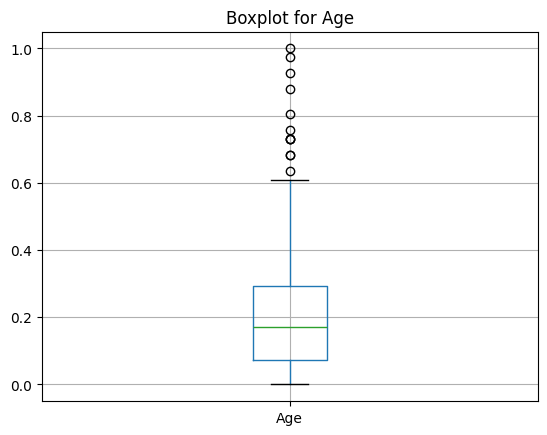

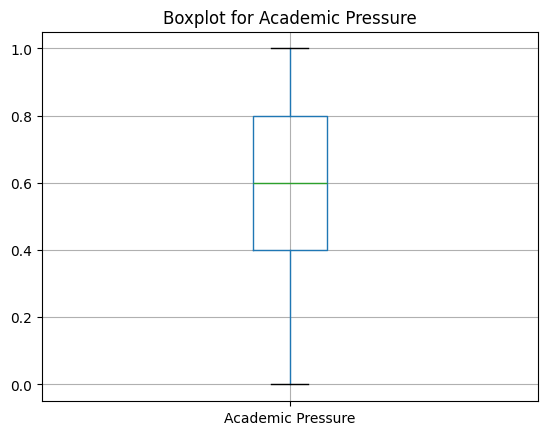

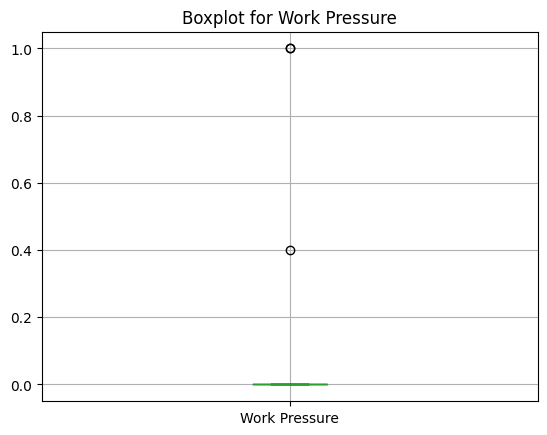

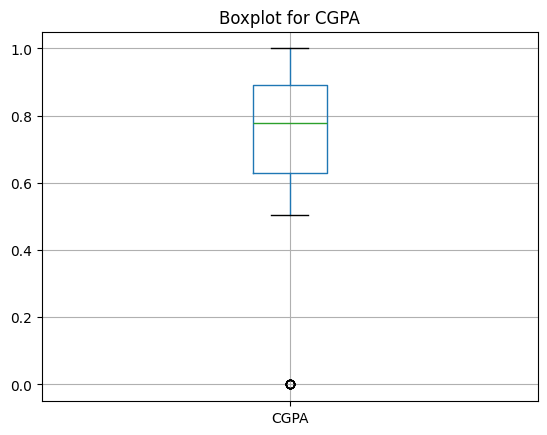

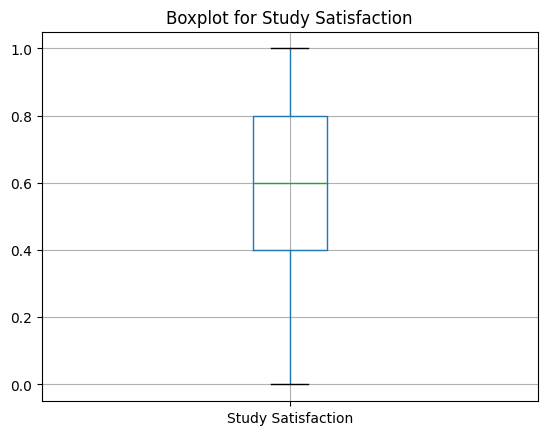

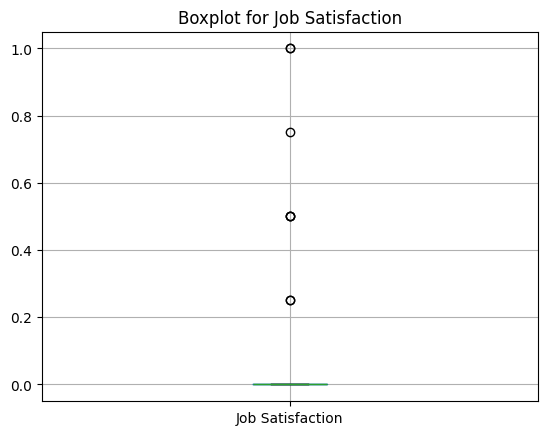

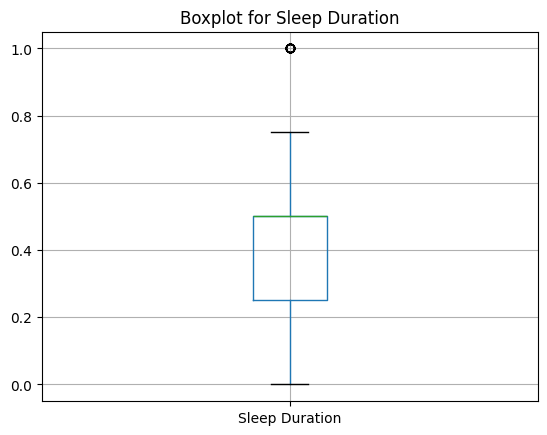

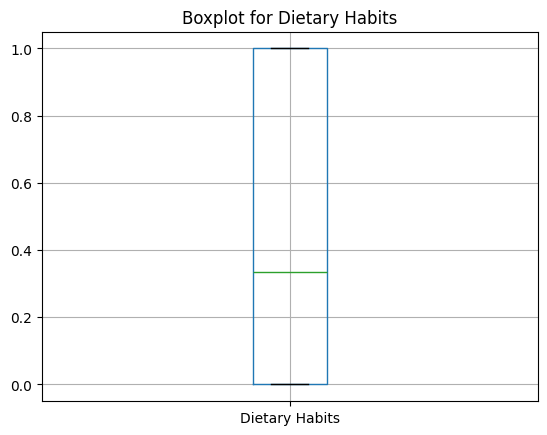

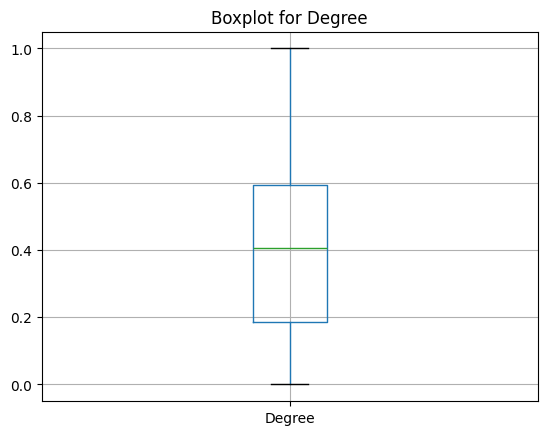

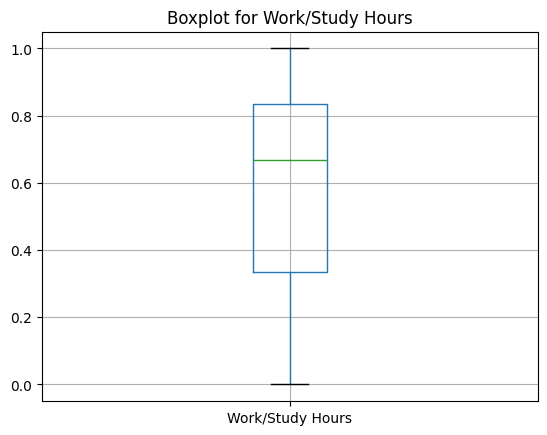

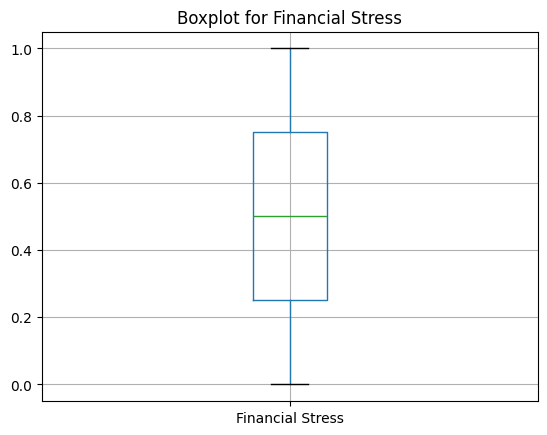

In [118]:
import matplotlib.pyplot as plt

numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'Work/Study Hours', 'Financial Stress'
]

for col in numerical_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


In [119]:
# Loop through numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Keep only rows within the IQR range
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

# Check new shape
print("Dataset shape after removing outliers:", df.shape)


Dataset shape after removing outliers: (27860, 16)


In [120]:
# Number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 27860


In [121]:
# Assuming 'Depression' is the target variable
X = df.drop('Depression', axis=1)  # all features
y = df['Depression']               # target column

# Split the dataset into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state ensures reproducibility
)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22288, 15)
X_test shape: (5572, 15)
y_train shape: (22288,)
y_test shape: (5572,)


In [122]:
print("y_train distribution:\n", y_train.value_counts())
print("\n(y_train percentages)\n", y_train.value_counts(normalize=True).round(3))

print("\ny_test distribution:\n", y_test.value_counts())
print("\n(y_test percentages)\n", y_test.value_counts(normalize=True).round(3))

y_train distribution:
 Depression
1    13041
0     9247
Name: count, dtype: int64

(y_train percentages)
 Depression
1    0.585
0    0.415
Name: proportion, dtype: float64

y_test distribution:
 Depression
1    3279
0    2293
Name: count, dtype: int64

(y_test percentages)
 Depression
1    0.588
0    0.412
Name: proportion, dtype: float64


In [123]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check the new distribution
print("Resampled y_train counts:\n", y_train_res.value_counts())

Resampled y_train counts:
 Depression
1    13041
0    13041
Name: count, dtype: int64


In [124]:
# Check first 5 rows of X_train
print("X_train head:")
print(X_train.head())

# Check first 5 rows of y_train
print("\ny_train head:")
print(y_train.head())

# Check first 5 rows of X_test
print("\nX_test head:")
print(X_test.head())

# Check first 5 rows of y_test
print("\ny_test head:")
print(y_test.head())

X_train head:
       Gender       Age  Profession  Academic Pressure  Work Pressure   CGPA  \
24260       1  0.146341           1                1.0            0.0  0.608   
5028        1  0.317073           1                0.2            0.0  0.651   
19895       0  0.048780           1                0.6            0.0  0.890   
22409       1  0.243902           1                0.8            0.0  0.547   
20733       1  0.317073           1                0.8            0.0  0.699   

       Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
24260                 0.4               0.0            0.75        1.000000   
5028                  0.6               0.0            0.50        0.000000   
19895                 0.8               0.0            0.50        0.333333   
22409                 0.4               0.0            0.25        0.333333   
20733                 0.2               0.0            0.25        0.333333   

         Degree  Have you ever



### **Model Training**


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [127]:
# Predict the class labels for X_test
y_pred = model.predict(X_test)

# Optional: get probabilities for class 1 (depression)
y_proba = model.predict_proba(X_test)[:, 1]

In [128]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8594759511844939


In [129]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))


Classification Report:
              precision    recall  f1-score   support

           0      0.841     0.812     0.826      2293
           1      0.871     0.893     0.882      3279

    accuracy                          0.859      5572
   macro avg      0.856     0.852     0.854      5572
weighted avg      0.859     0.859     0.859      5572



In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1861  432]
 [ 351 2928]]


In [131]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!
